 - mse: 6.7451 - val_loss: 5.6343 - val_mae: 2.0325 - val_mse: 5.6343
Epoch 681/800
12/12 [==============================] - 0s 6ms/step - loss: 6.7798 - mae: 1.8320 - mse: 6.7798 - val_loss: 5.6618 - val_mae: 2.0397 - val_mse: 5.6618
Epoch 682/800
12/12 [==============================] - 0s 6ms/step - loss: 6.7436 - mae: 1.8261 - mse: 6.7436 - val_loss: 5.5828 - val_mae: 2.0210 - val_mse: 5.5828
Epoch 683/800
12/12 [==============================] - 0s 6ms/step - loss: 6.7477 - mae: 1.8259 - mse: 6.7477 - val_loss: 5.6121 - val_mae: 2.0151 - val_mse: 5.6121
Epoch 684/800
12/12 [==============================] - 0s 6ms/step - loss: 6.7505 - mae: 1.8266 - mse: 6.7505 - val_loss: 5.7741 - val_mae: 2.0526 - val_mse: 5.7741
Epoch 685/800
12/12 [==============================] - 0s 7ms/step - loss: 6.7467 - mae: 1.8257 - mse: 6.7467 - val_loss: 5.6694 - val_mae: 2.0359 - val_mse: 5.6694
Epoch 686/800
12/12 [==============================] - 0s 6ms/step - loss: 6.7578 - mae: 1.8289 - mse: 6.

(0.0, 100.0)

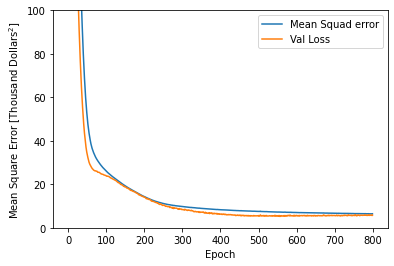

In [2]:
import numpy as np 
import pandas as pd
import keras
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing

(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()


batch_size = 32
epochs = 800
inp_shape = train_features.shape[1]

train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)
train_features = (train_features - train_mean) / train_std


model = Sequential([
    Dense(20, activation='relu', input_shape=(inp_shape,)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
history = model.fit(train_features, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)

model.evaluate(test_features, test_labels)
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch


plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
plt.plot(hist['epoch'], hist['mse'], label='Mean Squad error')
plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
plt.legend()
plt.ylim([0,100])

In [10]:
test_features_norm = (test_features - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm, test_labels)

4/4 [==============================] - 0s 5ms/step - loss: 19.2055 - mae: 2.6636 - mse: 19.2055


In [11]:
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

Root Mean Square Error on test set: 4.382
